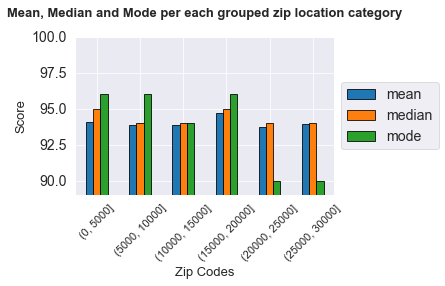

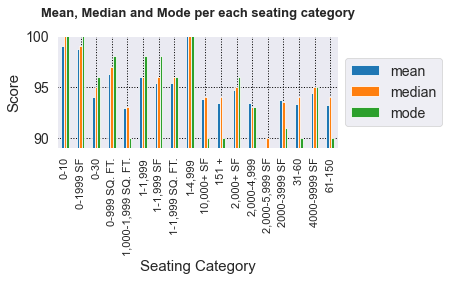

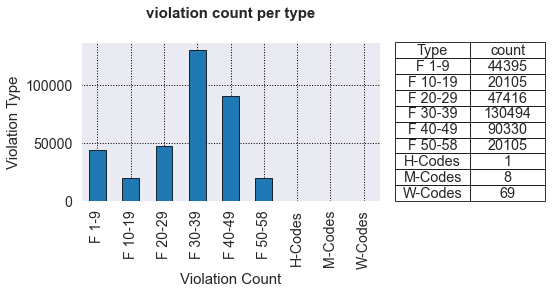

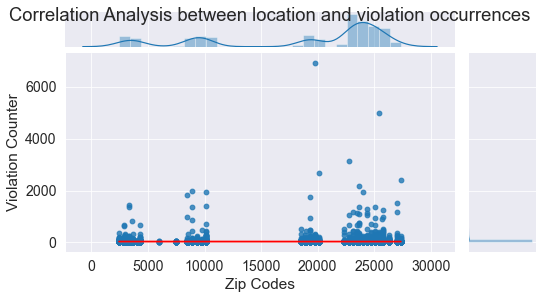

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 18 16:16:58 2020

@author: 
"""
#import of necessary libraries 
import tkinter as tk
from tkinter import * 
from tkinter import filedialog, Text, messagebox
import os
from PIL import ImageTk, Image
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.widgets import Slider, Button, RadioButtons
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)
import re
import numpy as np
import seaborn as sns
import csv, json
from pandas.plotting import table
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

#Setting initial parameters of the GUI
root = tk.Tk() #open root
root.title("Data Analyzer")
root.rowconfigure(0, weight=1)
root.columnconfigure(0, weight=1)
root.geometry('1200x750')
root.resizable(False, False) 

#Start of code for definitions. The structure of the code will be, firstly to define all the functions, followed by creating
# all the necessary frames. Each frame will be then coded individually and widgets will be set.
def show_frame(frame):
    frame.tkraise()

def clearFrame():
    for child in frame5.winfo_children():
        if child.winfo_class() != 'Button':
            child.destroy()
    
def addFile():   
    global fileName
    fileName=filedialog.askopenfilename(initialdir="/", title="Select File",
                                        filetypes=(("CSV data set", "*.csv"),("all files","*.*")))
    confirmationLabel.config(text=fileName)

def addFile2():
    global file2Name

    file2Name=filedialog.askopenfilename(initialdir="/", title="Select File",
                                        filetypes=(("CSV data set", "*.csv"),("all files","*.*")))
    confirmation2Label.config(text=file2Name)
    
def addFile3():
    global file3Name

    file3Name=filedialog.askopenfilename(initialdir="/", title="Select File",
                                        filetypes=(("CSV data set", "*.csv"),("all files","*.*")))
    confirmation3Label.config(text=file3Name)
    
def addFile4():
    global file4Name
    file4Name=filedialog.askopenfilename(initialdir="/", title="Select File",
                                        filetypes=(("JSON file", "*.json"),("all files","*.*")))
    confirmation4Label.config(text=file4Name)
    
def addFile5():
    global file5Name
    file5Name=filedialog.askopenfilename(initialdir="/", title="Select File",
                                        filetypes=(("JSON File", "*.json"),("all files","*.*")))
    confirmation5Label.config(text=file5Name)
    
def addFile6():
    global file6Name
    file6Name=filedialog.askopenfilename(initialdir="/", title="Select File",
                                        filetypes=(("JSON File", "*.json"),("all files","*.*")))
    confirmation6Label.config(text=file6Name)
    
def saveFile():
    global file
    file = filedialog.asksaveasfile(defaultextension=".json", filetypes=[("JSON File",".json")])
    
def parsingInspections():
    
    data = {}
    
    with open (fileName, "r") as f:
        reader=csv.reader(f)
        next(reader)
        data = {"data":[]}
        for row in reader:
            data["data"].append({"ACTIVITY DATE":
                                row[0], "OWNER ID":row[1], "OWNER NAME":row[2],
                                "FACILITY ID":row[3], "FACILITY NAME":row[4],
                                "RECORD ID":row[5], "PROGRAM NAME":row[6],"PROGRAM STATUS":row[7],
                                "PROGRAM ELEMENT (PE)":row[8],"PE DESCRIPTION":row[9], 
                                 "FACILITY ADDRESS":row[10], "FACILITY CITY":row[11],"FACILITY STATE":row[12],
                                 "FACILITY ZIP":row[13],"SERVICE CODE":row[14],"SERVICE DESCRIPTION":row[15],
                                 "SCORE":row[16],"GRADE":row[17],"SERIAL NUMBER":row[18],"EMPLOYEE ID":row[19],
                                    "Location":row[20],"2011 Supervisorial District Boundaries (Official)":row[21],
                                    "Census Tracts 2010":row[22],"Board Approved Statistical Areas":row[23],
                                    "Zip Codes":row[24]}) 
 
    with open ('Inspections.json', "w") as f:
        json.dump(data, f, indent=4)
        
def parsingInventory():
 
    data2 = {}
    
    with open (file2Name, "r") as f:
        reader2=csv.reader(f)
        next(reader2)
        data2 = {"data":[]}
        for row in reader2:
            data2["data"].append({"FACILITY ID":
                            row[0], "FACILITY NAME":row[1], "RECORD ID":row[2],
                            "PROGRAM NAME":row[3], "PROGRAM ELEMENT (PE)":row[4],
                            "PE DESCRIPTION":row[5], "FACILITY ADDRESS":row[6],"FACILITY CITY":row[7],
                            "FACILITY  STATE":row[8],"FACILITY ZIP":row[9], 
                             "FACILITY LATITUDE":row[10], "FACILITY LONGITUDE":row[11],"OWNER ID":row[12],
                             "OWNER NAME":row[13],"OWNER ADDRESS":row[14],"OWNER CITY":row[15],
                             "OWNER STATE":row[16],"OWNER ZIP":row[17],"Location":row[18],"Census Tracts 2010":row[19],
                                "2011 Supervisorial District Boundaries (Official)":row[20],"Board Approved Statistical Areas":row[21],
                                "Zip Codes":row[22]})   
    with open ("Inventroy.json", "w") as f:
        json.dump(data2, f, indent=4)     

def parsingViolations():
    
    data3 = {}
    with open (file3Name, "r") as f:
        reader3=csv.reader(f)
        next(reader3)
        data3 = {"data":[]}
        for row in reader3:
            data3["data"].append({"SERIAL NUMBER":
                            row[0], "VIOLATION  STATUS":row[1], "VIOLATION CODE":row[2],
                            "VIOLATION DESCRIPTION":row[3], "POINTS":row[4]})
    with open ("violations.json", "w") as f:
        json.dump(data3, f, indent=4)         
    
#load the data set using pandas and clean the file. Matplotlib and Seaborn used to create visualizations

def dataAnalysis():
    df=pd.read_json(file4Name, orient='split')


    global mmm_year
    global seating_mean_median_mode_year
    global owner_count_zip
    global df_to_print
    
    
    df = df.drop(df[df['PROGRAM STATUS'] != 'ACTIVE'].index) #drop non active users
    df.dropna(subset=['SCORE'], how='any', inplace=True) #drop missing value for score variable
    df = df.drop(df[df.SCORE == ''].index)
    #Extract seating info from PE description column
    df['Seating'] = df['PE DESCRIPTION'].str.extract('\(([^)]*)\)', expand=False).str.strip()
    df['PE DESCRIPTION'] = df['PE DESCRIPTION'].str.replace(r'\(([^)]*)\)', '').str.strip()
    # Find mean, mode, median for score based on zip codes
    zipdf = df.drop(['OWNER ID','OWNER NAME','RECORD ID','PROGRAM NAME','Board Approved Statistical Areas',
        'Census Tracts 2010','2011 Supervisorial District Boundaries (Official)','Location','GRADE',
        'PROGRAM ELEMENT (PE)','SERVICE CODE','EMPLOYEE ID','FACILITY ID','FACILITY NAME','PROGRAM STATUS',
                'PE DESCRIPTION','FACILITY ADDRESS','FACILITY CITY','FACILITY STATE','FACILITY ZIP','SERVICE DESCRIPTION',
                'SERIAL NUMBER'], axis=1)
    df_to_print = df
    #drop missing zip code values
    zipdf.dropna(subset=['ACTIVITY DATE'], how='any', inplace=True)
    zipdf = zipdf.drop(zipdf[zipdf['ACTIVITY DATE'] == ''].index)
    zipdf.dropna(subset=['Zip Codes'], how='any', inplace=True)
    zipdf = zipdf.drop(df[df['Zip Codes'] == ''].index)
    zipdf['Zip Codes'] = zipdf['Zip Codes'].astype(float)
    zipdf['SCORE'] = zipdf['SCORE'].astype(float)
    
    #Group per year and zip
    zipdf['ACTIVITY DATE'] = pd.to_datetime(zipdf['ACTIVITY DATE'])
    zipdf['Year'] = zipdf['ACTIVITY DATE'].dt.year
    zipdf = zipdf.drop('ACTIVITY DATE', axis=1)
    bins = [0,5000,10000,15000,20000,25000,30000]
    mean_median_year=zipdf.groupby(['Year', pd.cut(zipdf['Zip Codes'], bins=bins)])['SCORE'].agg(['mean','median']).astype(float).round(2)
    mean_median_year=mean_median_year.reset_index()
    mode_year=zipdf.groupby(['Year', pd.cut(zipdf['Zip Codes'], bins=bins)])['SCORE'].apply(lambda x: x.mode()).astype(float).round(2)
    mode_year=mode_year.reset_index()
    mode_year.columns = ['Year','Zip Codes','type','mode']
    del mode_year['type']
    mmm_year=pd.merge(mean_median_year,mode_year)
    mmm_year=mmm_year.pivot(index='Zip Codes', columns='Year')[['mean','median','mode']]
    
    #create bins to group zip codes for better visualisation and calculate the mean
    #bins = [0,5000,10000,15000,20000,25000,30000]
    zip_mean=zipdf.groupby(pd.cut(zipdf['Zip Codes'], bins=bins))['SCORE'].mean().astype(float).round(2)
    zip_mean=zip_mean.reset_index()
    zip_mean.columns = ['Zip_Codes','mean']
    # calculate the median 
    zip_median=zipdf.groupby(pd.cut(zipdf['Zip Codes'], bins=bins))['SCORE'].median().astype(float).round(2)
    zip_median=zip_median.reset_index()
    zip_median.columns = ['Zip_Codes','median']
    zip_mm=pd.merge(zip_mean,zip_median)
    # calculate the mode
    zip_mode=zipdf.groupby(pd.cut(zipdf['Zip Codes'], bins=bins))['SCORE'].apply(lambda x: x.mode()).astype(float).round(2)
    zip_mode=zip_mode.reset_index()
    zip_mode.columns = ['Zip_Codes','type','mode']
    del zip_mode['type']
    zip_mmm=pd.merge(zip_mm,zip_mode)

    # filtering non necessary columns
    seatingdf = df.drop(['OWNER ID','OWNER NAME','RECORD ID','PROGRAM NAME','Board Approved Statistical Areas',
        'Census Tracts 2010','2011 Supervisorial District Boundaries (Official)','Location','GRADE',
        'PROGRAM ELEMENT (PE)','SERVICE CODE','EMPLOYEE ID','FACILITY ID','FACILITY NAME','PROGRAM STATUS',
                'PE DESCRIPTION','FACILITY ADDRESS','FACILITY CITY','FACILITY STATE','FACILITY ZIP','SERVICE DESCRIPTION',
                'SERIAL NUMBER'], axis=1)
    seatingdf.dropna(subset=['ACTIVITY DATE'], how='any', inplace=True)
    seatingdf = seatingdf.drop(seatingdf[seatingdf['ACTIVITY DATE'] == ''].index)
    seatingdf['ACTIVITY DATE'] = pd.to_datetime(seatingdf['ACTIVITY DATE'])
    seatingdf['Year'] = seatingdf['ACTIVITY DATE'].dt.year
    seatingdf = seatingdf.drop('ACTIVITY DATE', axis=1)
    
    #drop missing values rows
    seatingdf.dropna(subset=['Seating'], how='any', inplace=True)
    seatingdf = seatingdf.drop(df[df.Seating == ''].index)
    seatingdf = seatingdf.drop(df[df['Zip Codes'] == ''].index)
    seatingdf['SCORE'] = seatingdf['SCORE'].astype(float)
    seatingdf['Zip Codes'] = seatingdf['Zip Codes'].astype(float)
    
    #group per year and seating type
    seating_mean_median_year = seatingdf.groupby(['Year','Seating']).SCORE.agg(['mean','median']).astype(float).round(2)
    seating_mean_median_year=seating_mean_median_year.reset_index()
    seating_mode_year = seatingdf.groupby(['Year','Seating']).SCORE.apply(lambda x: x.mode().iloc[0]).astype(float).round(2)
    seating_mode_year=seating_mode_year.reset_index()
    seating_mode_year.columns = ['Year','Seating','mode']
    seating_mean_median_mode_year=pd.merge(seating_mean_median_year,seating_mode_year)
    seating_mean_median_mode_year=seating_mean_median_mode_year.pivot(index='Seating', columns='Year')[['mean','median','mode']]
    seating_mean_median_mode_year.fillna(0, inplace=True)
    
    # find mean and median of score based on vencer's seating
    seatingmm=seatingdf.groupby('Seating').SCORE.agg(['mean','median']).astype(float).round(2)
    seatingmm=seatingmm.reset_index()
    modeSeat=seatingdf.groupby('Seating').SCORE.apply(lambda x: x.mode().iloc[0]).astype(float).round(2)
    modeSeat=modeSeat.reset_index()
    modeSeat.columns = ['Seating','mode']
    seatingmmm=pd.merge(seatingmm,modeSeat)
    
    if var1.get() == 1:
        show_frame(frame5)
        # plotting the first graph
        g=zip_mmm.plot(x="Zip_Codes", y=["mean", "median", "mode"], kind="bar", edgecolor='k')
        plt.xticks(fontsize=11, rotation=45)
        plt.grid(True)
        plt.rc('grid', linestyle=":", linewidth=1, color='black')
        
        fig=g.figure
        
        fig.subplots_adjust(left=0.16, right=0.76, top=0.85, bottom=0.30)
        
        canvas = FigureCanvasTkAgg(fig, master=frame5)
        canvas.draw()
        canvas.get_tk_widget().place(x=10, y=10)
        
        toolbarFrame = tk.Frame(master=frame5)
        toolbarFrame.place(x=90, y=298)
        toolbar = NavigationToolbar2Tk(canvas, toolbarFrame)

        plt.title("Mean, Median and Mode per each grouped zip location category", 
                  fontdict={'fontweight':'bold','fontsize':13}, pad=20)
        plt.xlabel('Zip Codes',size=13)
        plt.ylabel('Score', size=13)
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), labels=['mean', 'median','mode'])
        plt.ylim([89, 100])

        #plotting the second graph
        g2=seatingmmm.plot(x="Seating", y=["mean", "median", "mode"], kind="bar")

        fig2=g2.figure
        fig2.subplots_adjust(left=0.12, right=0.77, top=0.85, bottom=0.46)

        
        canvas2 = FigureCanvasTkAgg(fig2, master=frame5)
        canvas2.draw()
        canvas2.get_tk_widget().place(x=10, y=350)
        
        toolbarFrame2 = tk.Frame(master=frame5)
        toolbarFrame2.place(x=90, y=635)
        toolbar2 = NavigationToolbar2Tk(canvas2, toolbarFrame2)
        
        plt.xticks(fontsize=11)
        plt.xlabel('Seating Category',size=15)
        plt.ylabel('Score', size=15)
        plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
        plt.ylim([89, 100])
        plt.title("Mean, Median and Mode per each seating category", fontdict={'fontweight':'bold','fontsize':13}, pad=20) 
        
    violations=pd.read_json(file6Name, orient='split')
    # preparing the merge of the 2 df for calculating the violation graph
    # filter columns and keep only the essential ones
    violationsdf = df.drop(['ACTIVITY DATE','OWNER NAME','RECORD ID','PROGRAM NAME','Board Approved Statistical Areas',
        'Census Tracts 2010','2011 Supervisorial District Boundaries (Official)','Location','GRADE',
        'PROGRAM ELEMENT (PE)','SERVICE CODE','EMPLOYEE ID','FACILITY ID','Seating','PROGRAM STATUS',
                'PE DESCRIPTION','SCORE','FACILITY ADDRESS','FACILITY CITY','FACILITY STATE','FACILITY ZIP','SERVICE DESCRIPTION'
                       ], axis=1)
    merged_violations=pd.merge(violationsdf,violations)
    #drop based on 2 conditions, owner and code
    drop_duplicates = merged_violations.drop_duplicates(subset=['OWNER ID', 'VIOLATION CODE'])
    # count number of violations for each violation code
    facility_count=drop_duplicates.groupby('VIOLATION CODE').count()
    
    F_Bins = facility_count.reset_index()
    F_Bins_00=F_Bins.loc[F_Bins['VIOLATION CODE'].str.contains('^F+00', flags=re.I)]
    F_Bins_00 = F_Bins_00[['VIOLATION CODE','OWNER ID']]
    F_Bins_00_sum = F_Bins_00.sum()
    F_Bins_00_sum=F_Bins_00_sum.reset_index()
    F_Bins_00_sum = F_Bins_00_sum.drop(index=0)
    F_Bins_00_sum['index'] = 'F 1-9'
    F_Bins_00_sum.columns = ['Type','count']
    
    F_Bins_01=F_Bins.loc[F_Bins['VIOLATION CODE'].str.contains('^F+01', flags=re.I)]
    F_Bins_01 = F_Bins_01[['VIOLATION CODE','OWNER ID']]
    F_Bins_01_sum = F_Bins_01.sum()
    F_Bins_01_sum=F_Bins_01_sum.reset_index()
    F_Bins_01_sum = F_Bins_01_sum.drop(index=0)
    F_Bins_01_sum['index'] = 'F 10-19'
    F_Bins_01_sum.columns = ['Type','count']
    
    F_Bins_02=F_Bins.loc[F_Bins['VIOLATION CODE'].str.contains('^F+02', flags=re.I)]
    F_Bins_02 = F_Bins_02[['VIOLATION CODE','OWNER ID']]
    F_Bins_02_sum = F_Bins_02.sum()
    F_Bins_02_sum=F_Bins_02_sum.reset_index()
    F_Bins_02_sum = F_Bins_02_sum.drop(index=0)
    F_Bins_02_sum['index'] = 'F 20-29'
    F_Bins_02_sum.columns = ['Type','count']
    
    F_Bins_03=F_Bins.loc[F_Bins['VIOLATION CODE'].str.contains('^F+03', flags=re.I)]
    F_Bins_03 = F_Bins_03[['VIOLATION CODE','OWNER ID']]
    F_Bins_03_sum = F_Bins_03.sum()
    F_Bins_03_sum=F_Bins_03_sum.reset_index()
    F_Bins_03_sum = F_Bins_03_sum.drop(index=0)
    F_Bins_03_sum['index'] = 'F 30-39'
    F_Bins_03_sum.columns = ['Type','count']
    
    F_Bins_04=F_Bins.loc[F_Bins['VIOLATION CODE'].str.contains('^F+04', flags=re.I)]
    F_Bins_04 = F_Bins_04[['VIOLATION CODE','OWNER ID']]
    F_Bins_04_sum = F_Bins_04.sum()
    F_Bins_04_sum=F_Bins_04_sum.reset_index()
    F_Bins_04_sum = F_Bins_04_sum.drop(index=0)
    F_Bins_04_sum['index'] = 'F 40-49'
    F_Bins_04_sum.columns = ['Type','count']
    
    F_Bins_05=F_Bins.loc[F_Bins['VIOLATION CODE'].str.contains('^F+05', flags=re.I)]
    F_Bins_05 = F_Bins_05[['VIOLATION CODE','OWNER ID']]
    F_Bins_05_sum = F_Bins_01.sum()
    F_Bins_05_sum=F_Bins_05_sum.reset_index()
    F_Bins_05_sum = F_Bins_05_sum.drop(index=0)
    F_Bins_05_sum['index'] = 'F 50-58'
    F_Bins_05_sum.columns = ['Type','count']
    
    frames = [F_Bins_00_sum, F_Bins_01_sum, F_Bins_02_sum, F_Bins_03_sum, F_Bins_04_sum, F_Bins_05_sum]
    F_Bins_all_sum = pd.concat(frames)
    
    facility_count_violations=facility_count['FACILITY NAME']
    facility_count_violations=facility_count_violations.reset_index()
    facility_count_violations.columns = ['Violation Code','count']
    F_Violations=facility_count_violations.groupby([facility_count_violations['Violation Code'].str.contains
                              ('^F', flags=re.I)]).sum()
    F_Violations.reset_index(inplace=True)
    F_Violations = F_Violations.drop(index=0)
    F_Violations['Type'] = 'F-Codes'
    F_Violations= F_Violations.drop(['Violation Code'],axis=1)
    
    H_Violations=facility_count_violations.groupby([facility_count_violations['Violation Code'].str.contains
                                           ('^H', flags=re.I)]).sum()
    H_Violations.reset_index(inplace=True)
    H_Violations = H_Violations.drop(index=0)
    H_Violations['Type'] = 'H-Codes'
    H_Violations= H_Violations.drop(['Violation Code'],axis=1)

    M_Violations=facility_count_violations.groupby([facility_count_violations['Violation Code'].str.contains
                                           ('^M', flags=re.I)]).sum()
    M_Violations.reset_index(inplace=True)
    M_Violations = M_Violations.drop(index=0)
    M_Violations['Type'] = 'M-Codes'
    M_Violations= M_Violations.drop(['Violation Code'],axis=1)

    W_Violations=facility_count_violations.groupby([facility_count_violations['Violation Code'].str.contains
                                           ('^W', flags=re.I)]).sum()
    W_Violations.reset_index(inplace=True)
    W_Violations = W_Violations.drop(index=0)
    W_Violations['Type'] = 'W-Codes'
    W_Violations= W_Violations.drop(['Violation Code'],axis=1)

    frames = [F_Violations, H_Violations, M_Violations,W_Violations]
    violation_type_count = pd.concat(frames)
    violation_type_count.columns=['count', 'Type']
    violation_type_count = violation_type_count [['Type','count']]
    frames2 = (F_Bins_all_sum,H_Violations, M_Violations,W_Violations)
    all_violation_sum = pd.concat(frames2)
    if var2.get() == 1:
        show_frame(frame5)

        violation_graph = all_violation_sum.plot(x="Type", y="count", kind="bar",edgecolor='k', legend=False)
        violation_graph.figure.set_figwidth(8)

        fig3=violation_graph.figure
        fig3.subplots_adjust(left=0.18, right=0.70, top=0.86, bottom=0.31)
        
        canvas3 = FigureCanvasTkAgg(fig3, master=frame5)
        canvas3.draw()
        canvas3.get_tk_widget().place(x=600, y=350)
        
        toolbarFrame3 = tk.Frame(master=frame5)
        toolbarFrame3.place(x=750, y=635)
        toolbar3 = NavigationToolbar2Tk(canvas3, toolbarFrame3)
    
        plt.grid(True)
        plt.rc('grid', linestyle=":", linewidth=1, color='black')

        plt.xlabel('Violation Count',size=15)
        plt.ylabel('Violation Type', size=15)

        plt.table(cellText=all_violation_sum.values,colWidths = [0.40]*len(all_violation_sum.columns),
                  colLabels=all_violation_sum.columns,bbox=[1.05,0,0.5,1],
                  cellLoc = 'center', rowLoc = 'center',
                  loc='right')

        plt.title("violation count per type", fontdict={'fontweight':'bold','fontsize':15}, pad=25)

    owner_count = merged_violations.groupby(['OWNER ID']).count()
    owner_count=owner_count.reset_index()
    owner_count=owner_count[['OWNER ID','FACILITY NAME']]
    owner_count.columns = ['OWNER ID','Count']

    owner_count_zip=pd.merge(owner_count,violationsdf)
    owner_count_zip = owner_count_zip.drop_duplicates(subset=['OWNER ID'])
    owner_count_zip.dropna(subset=['Zip Codes'], how='any', inplace=True)
    owner_count_zip = owner_count_zip.drop(owner_count_zip[owner_count_zip['Zip Codes'] == ''].index)
    owner_count_zip['Zip Codes'] = owner_count_zip['Zip Codes'].astype(float)
    owner_count_zip.columns = ['OWNER ID', 'Violation Counter', 'FACILITY NAME', 'SERIAL NUMBER', 'Zip Codes']
            
    if var3.get() == 1:
        show_frame(frame5)
        sns.set_style('darkgrid')
        sns.set_context('paper', font_scale=1.6)

        graph_correlation= sns.jointplot(x='Zip Codes',y='Violation Counter', 
                                         data=owner_count_zip, line_kws={'color': 'red'}, 
                                         kind='reg')
        graph_correlation.fig.suptitle("Correlation Analysis between location and violation occurrences",
                                       fontdict={'fontweight':'bold','fontsize':12})
        graph_correlation.fig.set_figwidth(8)
        graph_correlation.fig.set_figheight(4)
        figure=graph_correlation.fig
        canvas = FigureCanvasTkAgg(figure, master=frame5)
        canvas.draw()
        canvas.get_tk_widget().place(x=600, y=10)
        toolbarFrame = tk.Frame(master=frame5)
        toolbarFrame.place(x=750, y=298)
        toolbar = NavigationToolbar2Tk(canvas, toolbarFrame)

def downloadTablesCSV():
    mmm_year.to_csv('./Mean_Median_Mode_Year.csv')
    seating_mean_median_mode_year.to_csv('./Mean_Median_Mode_Seating.csv')   
    owner_count_zip.to_csv('./Violation_Owner_ZipCode.csv')
    df_to_print.to_csv('./Extracted_Seating.csv')

def downloadTablesJSON():
    mmm_year.to_json('./Mean_Median_Mode_Year.json')
    seating_mean_median_mode_year.to_json('./Mean_Median_Mode_Seating.json')
    owner_count_zip.to_json('./Violation_Owner_ZipCode.json')
    df_to_print.to_json('./Extracted_Seating.json')
    
#opening the guide will load a txt file containing instructions on how to utilize correclty the GUI 
def guide():

    window = tk.Toplevel(root,bg="#CCCCCC")
    window.title("How to use Data Analyzer")
    window.geometry('900x600') 
    window.resizable(False, False)
    text_file = open('guide.txt', 'r')
    guide_text = text_file.read()
    my_text = Text(window, width=108, height=30)
    my_text.insert('end', guide_text)
    my_text.config(state=DISABLED)
    my_text.place(x=10, y=10)
    text_file.close()

# end of definitions 

# creation of all the necessary frames, which will be used to as containers for the widgets of the different pages.
# tk.raise will be used to bring frames at the top and give the impression of multiple pages being in the GUI.
frame1 = tk.Frame(root, bg="#2c313e")
frame2 = tk.Frame(root, bg="#2c313e")
frame3 = tk.Frame(root, bg="#2c313e")
frame4 = tk.Frame(root, bg="#2c313e")
frame5 = tk.Frame(root, bg="#2c313e")

for frame in (frame1, frame2, frame3, frame4, frame5):
    frame.grid(row=0, column=0, sticky="nsew")   
    
# creation of menu bar where a FAQ/Assistance for how to use the GUI will be later be available    
my_menu = Menu(root)
root.config(menu=my_menu)   
my_menu.config(bg="GREEN")
help_menu = Menu(my_menu)
my_menu.add_cascade(label="How to use?", menu=help_menu)
help_menu.add_command(label="Open Guide", command=guide)
    
###########################################################################################################
#------------------------------------------Frame 1 code
show_frame(frame1)
convertCSV = tk.Button(frame1, text="Convert CSV to JSON", padx=10, pady=5, 
                     fg="black", bg="white", command=lambda:show_frame(frame2))
convertCSV.place(x=435, y=350)

loadJSON = tk.Button(frame1, text="Analyse JSON", padx=28, pady=5, 
                     fg="black", bg="white", command=lambda:show_frame(frame3))
loadJSON.place(x=635, y=350)

label1 = Label(frame1,text="HOME",justify="center",bg="#2c313e",fg="#FFFFFF", font=("Agency FB", 40))
label1.place(x=550, y=220)
#------------------------------------------Frame 1 end of code
###########################################################################################################
#------------------------------------------Frame 2 code
back = tk.Button(frame2, text="Back", padx=18, pady=5, 
                     fg="black", bg="white", command=lambda:show_frame(frame1))
back.place(x=400, y=330)

cleanConvert = tk.Button(frame2, text="Convert and Save", padx=18, pady=5, 
                     fg="black", bg="white", command=lambda:[parsingInspections(),parsingInventory(),parsingViolations()])##########
cleanConvert.place(x=500, y=330)

select = tk.Button(frame2, text="Select File", padx=18, pady=5, 
                     fg="black", bg="white", command=addFile)
select.place(x=150, y=150)

select2 = tk.Button(frame2, text="Select File", padx=18, pady=5, 
                     fg="black", bg="white",command=addFile2)
select2.place(x=150, y=200)

select3 = tk.Button(frame2, text="Select File", padx=18, pady=5, 
                     fg="black", bg="white",command=addFile3)
select3.place(x=150, y=250)


label2 = Label(frame2, text="File Preparation",justify="center", fg="#FFFFFF", 
               font=("Agency FB", 40), bg="#2c313e")
label2.place(x=230, y=30)
label3 = Label(frame2, text="Convert and analyse your CSV data set",fg="#FFFFFF", 
               font=("Agency FB", 20), bg="#2c313e")
label3.place(x=205, y=90)
selectFile = Label(frame2, text="1-Inspections",fg="#FFFFFF", 
               font=("Agency FB", 15), bg="#2c313e")
selectFile.place(x=65, y=150)
selectFile2 = Label(frame2, text="2-Inventroy",fg="#FFFFFF", 
               font=("Agency FB", 15), bg="#2c313e")
selectFile2.place(x=65, y=200)
selectFile3 = Label(frame2, text="3-Violations",fg="#FFFFFF", 
               font=("Agency FB", 15), bg="#2c313e")
selectFile3.place(x=65, y=250)

warning_Label3 = Label(frame2, text="*saves directly in GUI's folder",justify="center", fg="#FFFFFF", 
               font=("Agency FB", 15), bg="#2c313e")
warning_Label3.place(x=500, y=360)

confirmationLabel = Label(frame2, text="No file has been selected")
confirmationLabel.place(x=260, y=155)
confirmation2Label = Label(frame2, text="No file has been selected")
confirmation2Label.place(x=260, y=205)
confirmation3Label=Label(frame2, text="No file has been selected")
confirmation3Label.place(x=260, y=255)
#------------------------------------------Frame 2 end of code
###########################################################################################################
#------------------------------------------Frame 3 code
back2 = tk.Button(frame3, text="Back", padx=18, pady=5, 
                     fg="black", bg="white", command=lambda:show_frame(frame1))
back2.place(x=490, y=330)
AnalyseJSON = tk.Button(frame3, text="Next", padx=18, pady=5, 
                     fg="black", bg="white", command=lambda:show_frame(frame4))
AnalyseJSON.place(x=570, y=330)

select4 =tk.Button(frame3, text="Select File", padx=18, pady=5, 
                     fg="black", bg="white",command=addFile4)
select4.place(x=150, y=200)

select5 =tk.Button(frame3, text="Select File", padx=18, pady=5, 
                     fg="black", bg="white",command=addFile5)
select5.place(x=150, y=250)

select6 =tk.Button(frame3, text="Select File", padx=18, pady=5, 
                     fg="black", bg="white",command=addFile6)
select6.place(x=150, y=300)


label4 = Label(frame3, text="JSON File Selection",justify="center", fg="#FFFFFF", 
               font=("Agency FB", 40), bg="#2c313e")
label4.place(x=205, y=30)
label5 = Label(frame3, text="Upload and Analyse your JSON data set",justify="center", fg="#FFFFFF", 
               font=("Agency FB", 20), bg="#2c313e")
label5.place(x=195, y=85)

confirmation4Label=Label(frame3, text="No file has been selected")
confirmation4Label.place(x=260, y=205)

confirmation5Label=Label(frame3, text="No file has been selected")
confirmation5Label.place(x=260, y=255)

confirmation6Label=Label(frame3, text="No file has been selected")
confirmation6Label.place(x=260, y=305)

selectFile4 = Label(frame3, text="1-Inspections",fg="#FFFFFF", 
               font=("Agency FB", 15), bg="#2c313e")
selectFile4.place(x=65, y=200)
selectFile5 = Label(frame3, text="2-Inventroy",fg="#FFFFFF", 
               font=("Agency FB", 15), bg="#2c313e")
selectFile5.place(x=65, y=250)
selectFile6 = Label(frame3, text="3-Violations",fg="#FFFFFF", 
               font=("Agency FB", 15), bg="#2c313e")
selectFile6.place(x=65, y=300)
#------------------------------------------Frame 3 end of code
###########################################################################################################
#------------------------------------------Frame 4 code
back3 = tk.Button(frame4, text="Back", padx=18, pady=5, 
                     fg="black", bg="white", command=lambda:show_frame(frame3))
back3.place(x=490, y=330)

exitButton = tk.Button(frame4, text="Exit", padx=22, pady=5, 
                     fg="black", bg="white", command=root.destroy)
exitButton.place(x=570, y=330)


var1 = IntVar()
var2 = IntVar()
var3 = IntVar()

inspectionButton = Checkbutton(frame4, text="inspection score per year", 
                               variable=var1, fg="#FFFFFF",activebackground='#2c313e',
                               selectcolor="#474747",font=("Agency FB", 15), bg="#2c313e").place(x=150,y=150) 
violationButton = Checkbutton(frame4, text="violation analysis", variable=var2, 
                               fg="#FFFFFF",activebackground='#2c313e',
                               selectcolor="#474747",font=("Agency FB", 15), bg="#2c313e").place(x=150,y=200)
correlationButton = Checkbutton(frame4, text="correlation analysis", variable=var3,
                                fg="#FFFFFF",activebackground='#2c313e',
                                selectcolor="#474747",font=("Agency FB", 15), bg="#2c313e").place(x=150,y=250)
analyseButton = tk.Button(frame4, text="Analyse", padx=18, pady=5, fg="black", 
                          bg="white",command=dataAnalysis).place(x=350,y=250)

analysisSelection = Label(frame4, text="Analysis selection",justify="center", fg="#FFFFFF", 
               font=("Agency FB", 40), bg="#2c313e")
analysisSelection.place(x=200, y=30)

warning_Label = Label(frame4, text="*Analysis may take up to 25/30 secs",justify="center", fg="#FFFFFF", 
               font=("Agency FB", 15), bg="#2c313e")
warning_Label.place(x=350, y=280)
#------------------------------------------Frame 4 end of code
###########################################################################################################
#------------------------------------------Frame 5 common code
back4 = tk.Button(frame5, text="Back", padx=18, pady=5, 
                    fg="black", bg="white", command=lambda:[show_frame(frame4),clearFrame()])
back4.place(x=460, y=700)

downloadCleanData = tk.Button(frame5, text="Download extra data CSV", padx=18, pady=5, fg="black", 
                          bg="white", command=downloadTablesCSV).place(x=560,y=700)

downloadCleanData2 = tk.Button(frame5, text="Download extra data JSON", padx=18, pady=5, fg="black", 
                               bg="white", command=downloadTablesJSON).place(x=740,y=700)

warning_Label2 = Label(frame5, text="*saves directly in GUI's folder",justify="center", fg="#FFFFFF", 
               font=("Agency FB", 15), bg="#2c313e")
warning_Label2.place(x=925, y=698)

root.mainloop() #close root


